In [18]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 5000)

In [2]:
race_df = pd.read_csv("../data/race.csv")
ethn_df = pd.read_csv("../data/ethnicities.csv")

In [3]:
race_df = race_df.drop(race_df.iloc[:, [4, 5, 6]], axis=1)
race_df = race_df.loc[race_df['Year'] == 2018]
race_df.head()

,Year,Reporting Period,Race,Number of Applicants
148,2018,2018 Q1,American Indian and/or Alaska Native,3278.0
149,2018,2018 Q1,Asian Indian,7195.0
150,2018,2018 Q1,Black or African American,38554.0
151,2018,2018 Q1,Cambodian,1385.0
152,2018,2018 Q1,Chinese,15012.0


In [4]:
ethn_df = ethn_df.drop(ethn_df.iloc[:, [4]], axis=1)
ethn_df = ethn_df.loc[ethn_df['Year'] == 2018]
ethn_df.head()

,Year,Reporting Period,Ethnicity,Number of Applicants
72,2018,2018 Q1,Hispanic - Cuban,743.0
73,2018,2018 Q1,Hispanic - Guatemalan,5418.0
74,2018,2018 Q1,Hispanic - Mexican/Mexican American/Chicano,103550.0
75,2018,2018 Q1,Hispanic - Mixed Ethnicity,6147.0
76,2018,2018 Q1,Hispanic - Other,43612.0


In [5]:
ethn_df['Ethnicity'].value_counts().keys().tolist()

['Not Hispanic',
 'Hispanic - Salvadoran',
 'Hispanic - Puerto Rican',
 'Ethnicity not reported',
 'Hispanic - Mexican/Mexican American/Chicano',
 'Hispanic - Cuban',
 'Hispanic - Other',
 'Hispanic - ethnic origin not reported',
 'Hispanic - Guatemalan',
 'Hispanic - Mixed Ethnicity']

In [6]:
ethn_df = ethn_df.loc[ethn_df['Ethnicity'] != 'Not Hispanic']
ethn_df = ethn_df.loc[ethn_df['Ethnicity'] != 'Ethnicity not reported']

In [7]:
ethn_df['Race'] = 'Hispanic'
ethn_df = ethn_df.drop('Ethnicity', axis=1)

In [8]:
combined_df = race_df.append(ethn_df, sort=False)
combined_df.tail()

,Year,Reporting Period,Race,Number of Applicants
105,2018,2018 Q4,Hispanic,6066.0
106,2018,2018 Q4,Hispanic,38948.0
107,2018,2018 Q4,Hispanic,1696.0
108,2018,2018 Q4,Hispanic,6601.0
109,2018,2018 Q4,Hispanic,42934.0


In [9]:
grouped_df = combined_df.groupby("Race", as_index=False).sum().drop('Year', axis=1)
grouped_df.head()

,Race,Number of Applicants
0,American Indian and/or Alaska Native,11885.0
1,Asian Indian,28332.0
2,Black or African American,145474.0
3,Cambodian,4891.0
4,Chinese,52769.0


In [10]:
asian = ['Vietnamese', 'Hmong', 'Chinese', 'Japanese', 'Filipino',
         'Cambodian', 'Other Asian', 'Asian Indian', 'Korean', 'Laotian']
pacific = ['Guamanian or Chamorro', 'Native Hawaiian', 'Other Pacific Islander', 'Samoan']

for race in asian:
    for i in range(len(grouped_df)):
        current = grouped_df.iloc[i, 0]
        if current == race:
            grouped_df.iloc[i, 0] = 'Asian'
            
for race in pacific:
    for i in range(len(grouped_df)):
        current = grouped_df.iloc[i, 0]
        if current == race:
            grouped_df.iloc[i, 0] = 'Native Hawaiian and Other Pacific Islander'

grouped_df['Race'].value_counts().keys().tolist()

['Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Black or African American',
 'Mixed Race',
 'American Indian and/or Alaska Native',
 'Not Reported',
 'Other',
 'White',
 'Hispanic']

In [11]:
grouped_race = grouped_df.groupby('Race', as_index=False).sum()
grouped_race

,Race,Number of Applicants
0,American Indian and/or Alaska Native,11885.0
1,Asian,197372.0
2,Black or African American,145474.0
3,Hispanic,770856.0
4,Mixed Race,47635.0
5,Native Hawaiian and Other Pacific Islander,5421.0
6,Not Reported,814273.0
7,Other,157923.0
8,White,545721.0


In [12]:
grouped_race = grouped_race.loc[grouped_race['Race'] != 'Not Reported'].loc[grouped_race['Race'] != 'Other']

In [13]:
population_percents = [1.6, 15.2, 6.5, 39.1, 3.9, .5, 37.2]

populations = [395570.45*i for i in population_percents]

grouped_race['Population Size'] = populations
grouped_race

,Race,Number of Applicants,Population Size
0,American Indian and/or Alaska Native,11885.0,6.329127e+05
1,Asian,197372.0,6.012671e+06
2,Black or African American,145474.0,2.571208e+06
3,Hispanic,770856.0,1.546680e+07
4,Mixed Race,47635.0,1.542725e+06
5,Native Hawaiian and Other Pacific Islander,5421.0,1.977852e+05
8,White,545721.0,1.471522e+07


In [14]:
grouped_race['Insurance Application Rate'] = round(grouped_race['Number of Applicants']*100/grouped_race['Population Size'], 2)
grouped_race

,Race,Number of Applicants,Population Size,Insurance Application Rate
0,American Indian and/or Alaska Native,11885.0,6.329127e+05,1.88
1,Asian,197372.0,6.012671e+06,3.28
2,Black or African American,145474.0,2.571208e+06,5.66
3,Hispanic,770856.0,1.546680e+07,4.98
4,Mixed Race,47635.0,1.542725e+06,3.09
5,Native Hawaiian and Other Pacific Islander,5421.0,1.977852e+05,2.74
8,White,545721.0,1.471522e+07,3.71


In [15]:
grouped_race.to_csv("../data/cleaned/race.csv", index=False)

In [20]:
sorted_df = grouped_race.sort_values('Number of Applicants')
sorted_df

,Race,Number of Applicants,Population Size,Insurance Application Rate
5,Native Hawaiian and Other Pacific Islander,5421.0,1.977852e+05,2.74
0,American Indian and/or Alaska Native,11885.0,6.329127e+05,1.88
4,Mixed Race,47635.0,1.542725e+06,3.09
2,Black or African American,145474.0,2.571208e+06,5.66
1,Asian,197372.0,6.012671e+06,3.28
8,White,545721.0,1.471522e+07,3.71
3,Hispanic,770856.0,1.546680e+07,4.98


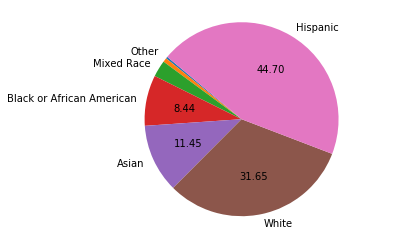

<Figure size 432x288 with 0 Axes>

In [21]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''

plt.pie(sorted_df['Number of Applicants'], labels=['Other', ''] + sorted_df['Race'][2:].tolist(), 
        autopct=my_autopct, startangle=140)
plt.axis('equal')
plt.show()
plt.savefig('../images/pie.png')